### HOG (Histogram of Oriented Gradients)

- _Feature Descriptor_ is a simplified representation of the image that contains only the most important information about the image.
- The HOG feature descriptor counts the occurrences of gradient orientation in localized portions of an image.
- We use _scikit-image_ to compute Histogram of Oriented Gradients (HOG) features from images.


####  HOG Parameters
- orientations:
Number of bins for the gradient orientation histogram.
→ Controls the angle resolution. Common value: 9

- pixels_per_cell:
Size of the cell (in pixels) over which the histogram is computed.
→ Smaller cells capture finer details. E.g., (8, 8)

- cells_per_block:
Number of cells in each block used for normalization.
→ Helps with contrast variation. E.g., (2, 2)

- block_norm:
Method used to normalize the block histograms.
→ Common values: 'L2-Hys', 'L1', 'L2'

- visualize (optional):
If True, returns a visualization of the HOG image.
→ Useful for debugging or feature inspection.

- transform_sqrt (optional):
Applies power law compression to improve contrast.
→ Useful for images with high dynamic range.

#### For a detailed information:

[HOG Feature Descriptor: Feature Engineering for Images](https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/)

Features: [0.00613222 0.00685603 0.16992019 ... 0.         0.00932571 0.        ]
Features shape: (120780,)
Feature range: 0.0 - 0.6621336804646877


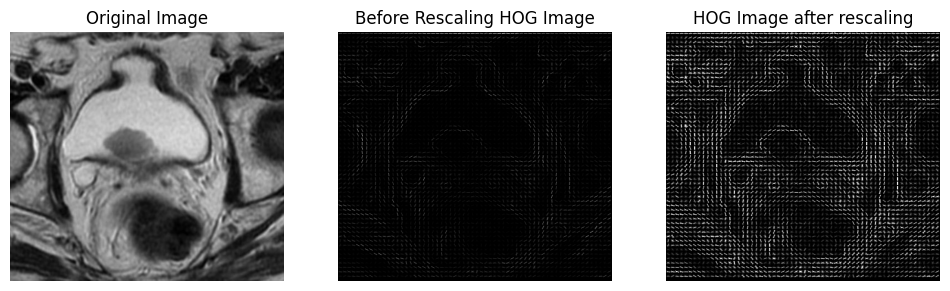

In [8]:
import cv2 as cv
import numpy as np
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

# Load an image
image = cv.imread('cancer.jpg', cv.IMREAD_GRAYSCALE)

"""Hog Descriptor Code"""
# Calculate HOG features - features are normalised between 0 and 1
features, hog_image = hog(image, orientations=9,pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)

# Rescale HOG features for better visualization
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

print(f'Features: {features}')
print(f'Features shape: {np.shape(features)}')
print(f'Feature range: {np.min(features)} - {np.max(features)}')

"""Visualization Code"""
# Display the original image and HOG features
plt.figure(figsize=(12, 4))

# First subplot for the original image
plt.subplot(131)  # Use 131 for the first subplot (1 row, 3 columns, 1st subplot)
plt.imshow(image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Original Image')

# Second subplot for the HOG image before rescaling
plt.subplot(132)  # Use 132 for the second subplot (1 row, 3 columns, 2nd subplot)
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.axis('off')
plt.title('Before Rescaling HOG Image')

# Third subplot for the HOG image after rescaling
plt.subplot(133)  # Use 133 for the third subplot (1 row, 3 columns, 3rd subplot)
plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
plt.axis('off')
plt.title('HOG Image after rescaling')

plt.show()

